# [ICTCOG AI Academy] 7기 고급시각저녁반
# OObject Detection (6) - One Stage 기법 (3)

### 학습
- 학습에 관한 많은 파라미터: initializer
- 목표: object detection 

### 데이터셋 구축
상황에 맞추어 구축
1. Raw Data : 클래스 별 디렉토리 
  - tf.keras.preprocessing.image_dataset_from_directory
  - Numpy, Tensor형태 구축 용이
2. **Pandas DataFrame**
  - tf.keras.preprocessing.image.ImageDataGenerator,flow_from_dataframe
  - EDA 쉬웁
  - 통합 관리
3. numpy 
  - 범용적
4. Tensor
  - GPU
5. imagedb


- [Caltech 101 ](http://www.vision.caltech.edu/Image_Datasets/Caltech101/)
  - 디렉토리 구조로 구성 
    - segmentation, detection 에서는 annotation 파일이 필요함
        - 이미지 101_ObjectCategories.tar.gz (131Mbytes)와  Annotations.tar 으로 구성
        - > Annotation : csv, matlab(범용적) 형식이 흔함


In [3]:
from scipy import io

Annotation 파일 불러오기

In [5]:
mat =io.loadmat('./Annotations/Airplanes_Side_2/annotation_0003.mat')

In [6]:
mat #box_coord 4개의 점

{'__globals__': [],
 '__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN, Created on: Tue Dec 14 11:27:02 2004',
 '__version__': '1.0',
 'box_coord': array([[ 36, 135,  47, 331]], dtype=uint16),
 'obj_contour': array([[  1.79284274,  15.58316532,  15.87046371,  13.57207661,
          13.57207661,  14.72127016,  15.00856855,  42.8765121 ,
          50.05897177,  50.63356855,  61.26360887, 108.09324597,
         126.19304435, 128.20413306, 130.50252016, 163.54183468,
         179.34324597, 190.26058468, 194.85735887, 204.62550403,
         225.88558468, 271.27872984, 274.72631048, 276.45010081,
         277.02469758, 275.87550403, 282.48336694, 283.63256048,
         276.73739919, 270.70413306, 261.79788306, 261.51058468,
         256.91381048, 256.05191532, 239.38860887, 248.86945565,
         254.04082661, 258.06300403, 257.20110887, 249.73135081,
         244.84727823, 243.69808468, 245.421875  , 235.65372984,
         211.80796371, 206.34929435, 202.32711694, 203.1890121 ,
         

In [7]:
mat['box_coord']

array([[ 36, 135,  47, 331]], dtype=uint16)

wild_cat 클래스스

In [13]:
for i in range(1,35):
  print(io.loadmat(f'./Annotations/wild_cat/annotation_000{i:}.mat')['box_coord'])
        ## 000에서 문제가 생김

[[ 27 219   9 234]]
[[  6 256   4 291]]
[[ 44 193   3 296]]
[[ 22 250  67 230]]
[[ 23 262   4 295]]
[[  9 190  41 294]]
[[ 46 137   5 270]]
[[  4 138   2 290]]
[[ 13 206  20 270]]


FileNotFoundError: ignored

In [11]:
for i in range(1,35):
  print(io.loadmat(f'./Annotations/wild_cat/annotation_{i:04d}.mat')['box_coord'])

[[ 27 219   9 234]]
[[  6 256   4 291]]
[[ 44 193   3 296]]
[[ 22 250  67 230]]
[[ 23 262   4 295]]
[[  9 190  41 294]]
[[ 46 137   5 270]]
[[  4 138   2 290]]
[[ 13 206  20 270]]
[[  9 225   6 299]]
[[ 11 183  51 260]]
[[ 14 197  13 278]]
[[  9 277  14 182]]
[[  3 224   2 255]]
[[ 28 134  73 213]]
[[ 29 180   5 280]]
[[ 14 179  14 279]]
[[  6  86   4 216]]
[[  6 220  11 276]]
[[ 40 196  31 282]]
[[  2 273  22 236]]
[[  3 140   6 284]]
[[ 13 138  14 281]]
[[ 34 204  21 195]]
[[  9 196  25 263]]
[[ 72 158 107 181]]
[[  2 225  65 255]]
[[  1 225  11 271]]
[[ 22 180  10 284]]
[[ 10 208   3 296]]
[[ 32 191   2 164]]
[[ 47 201  20 209]]
[[ 20 225   2 288]]
[[ 28 293   9 185]]


In [17]:
temp=[]
for i in range(1,35):
  temp.append(io.loadmat(f'./Annotations/wild_cat/annotation_{i:04d}.mat')['box_coord'])

In [14]:
import numpy as np

In [19]:
np.array(temp).shape  #34개의 1x4 데이터터

(34, 1, 4)

In [21]:
import tensorflow as tf

In [24]:
tf.keras.preprocessing.image_dataset_from_directory        #이미지 -> Tensor , 이미지 사이즈도 지정 가능tf.keras.preprocessing.image_dataset_from_directory        #이미지 -> Tensor , 이미지 사이즈도 지정 가능
idg = tf.keras.preprocessing.image.ImageDataGenerator()    # flow_from_dataframe, flow_from_directory
idg = tf.keras.preprocessing.image.ImageDataGenerator()    # flow_from_dataframe, flow_from_directory

In [ ]:
idg.flow_from_directory    # 디렉토리 형식
idg.flow_from_dataframe( ) # 데이터 프레임 형식

In [25]:
import matplotlib.pyplot as plt

In [26]:
from PIL import Image

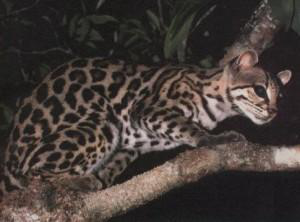

In [32]:
Image.open('./101_ObjectCategories/wild_cat/image_0003.jpg')

데이터 프레임 형식으로 이미지 데이터 관리

In [34]:
import pandas as pd

In [46]:
dataset=pd.DataFrame([f'./101_ObjectCategories/wild_cat/image_{i:04d}.jpg' for i in range(1,35)], columns=['file'])

In [47]:
dataset

,file
0,./101_ObjectCategories/wild_cat/image_0001.jpg
1,./101_ObjectCategories/wild_cat/image_0002.jpg
2,./101_ObjectCategories/wild_cat/image_0003.jpg
3,./101_ObjectCategories/wild_cat/image_0004.jpg
4,./101_ObjectCategories/wild_cat/image_0005.jpg
5,./101_ObjectCategories/wild_cat/image_0006.jpg
6,./101_ObjectCategories/wild_cat/image_0007.jpg
7,./101_ObjectCategories/wild_cat/image_0008.jpg
8,./101_ObjectCategories/wild_cat/image_0009.jpg
9,./101_ObjectCategories/wild_cat/image_0010.jpg


In [48]:
dataset['target']='wild_cat'
dataset

,file,target
0,./101_ObjectCategories/wild_cat/image_0001.jpg,wild_cat
1,./101_ObjectCategories/wild_cat/image_0002.jpg,wild_cat
2,./101_ObjectCategories/wild_cat/image_0003.jpg,wild_cat
3,./101_ObjectCategories/wild_cat/image_0004.jpg,wild_cat
4,./101_ObjectCategories/wild_cat/image_0005.jpg,wild_cat
5,./101_ObjectCategories/wild_cat/image_0006.jpg,wild_cat
6,./101_ObjectCategories/wild_cat/image_0007.jpg,wild_cat
7,./101_ObjectCategories/wild_cat/image_0008.jpg,wild_cat
8,./101_ObjectCategories/wild_cat/image_0009.jpg,wild_cat
9,./101_ObjectCategories/wild_cat/image_0010.jpg,wild_cat


In [49]:
temp=[]
for i in range(1,35):
  temp.append(io.loadmat(f'./Annotations/wild_cat/annotation_{i:04d}.mat')['box_coord'][0])

In [50]:
dataset['coord']=temp
dataset

,file,target,coord
0,./101_ObjectCategories/wild_cat/image_0001.jpg,wild_cat,"[27, 219, 9, 234]"
1,./101_ObjectCategories/wild_cat/image_0002.jpg,wild_cat,"[6, 256, 4, 291]"
2,./101_ObjectCategories/wild_cat/image_0003.jpg,wild_cat,"[44, 193, 3, 296]"
3,./101_ObjectCategories/wild_cat/image_0004.jpg,wild_cat,"[22, 250, 67, 230]"
4,./101_ObjectCategories/wild_cat/image_0005.jpg,wild_cat,"[23, 262, 4, 295]"
5,./101_ObjectCategories/wild_cat/image_0006.jpg,wild_cat,"[9, 190, 41, 294]"
6,./101_ObjectCategories/wild_cat/image_0007.jpg,wild_cat,"[46, 137, 5, 270]"
7,./101_ObjectCategories/wild_cat/image_0008.jpg,wild_cat,"[4, 138, 2, 290]"
8,./101_ObjectCategories/wild_cat/image_0009.jpg,wild_cat,"[13, 206, 20, 270]"
9,./101_ObjectCategories/wild_cat/image_0010.jpg,wild_cat,"[9, 225, 6, 299]"


In [ ]:
tf.keras.preprocessing.image.ImageDataGenerator #전처리 가능능

이미지 34 개로 학습하기 위해 적합한 방법은 ?

### transfer learning
1. feature extractor 
  -  convolution 부분만 가져와서 dense를 새로 만들어서 붙임
  - 데이터 적은 경우 더 적합미지 34 개로 학습하기 위해 적합한 방법은 ?
2. fine tuning
  - dense를 가져옴

In [53]:
model=tf.keras.applications.VGG16(include_top=False) #데이터가 너무적어서 더 간단하게 만들 예정
model.trainable= False

In [55]:
model.trainable= False

In [57]:
model.input #Convolution부분에서는 input 크기 상관 없음

<KerasTensor: shape=(None, None, None, 3) dtype=float32 (created by layer 'input_3')>

In [59]:
im=Image.open('./101_ObjectCategories/wild_cat/image_0003.jpg')

In [61]:
im.height, im.width

(222, 300)

### 이미지 크기 맞추는 테크닉
- spartial pyramid pooling
- RoI Pooling
- Global Average Pooling

In [63]:
inputs=model.input

#### multi-outputs 
-  클래스와 각 좌표를 예측
- tf.keras.models.Model 통해 가능

In [69]:
x=tf.keras.layers.GlobalAvgPool2D()(model.output)
class_=tf.keras.layers.Dense(1)(x)
box=tf.keras.layers.Dense(4)(x)
outputs =[class_, box]

In [73]:
model_ =tf.keras.models.Model(inputs=inputs, outputs=outputs)

In [74]:
model_.summary() #multi-outputs 형태의 모델로 생성함

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, None, None, 6 1792        input_3[0][0]                    
__________________________________________________________________________________________________
block1_conv2 (Conv2D)           (None, None, None, 6 36928       block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_pool (MaxPooling2D)      (None, None, None, 6 0           block1_conv2[0][0]               
______________________________________________________________________________________________

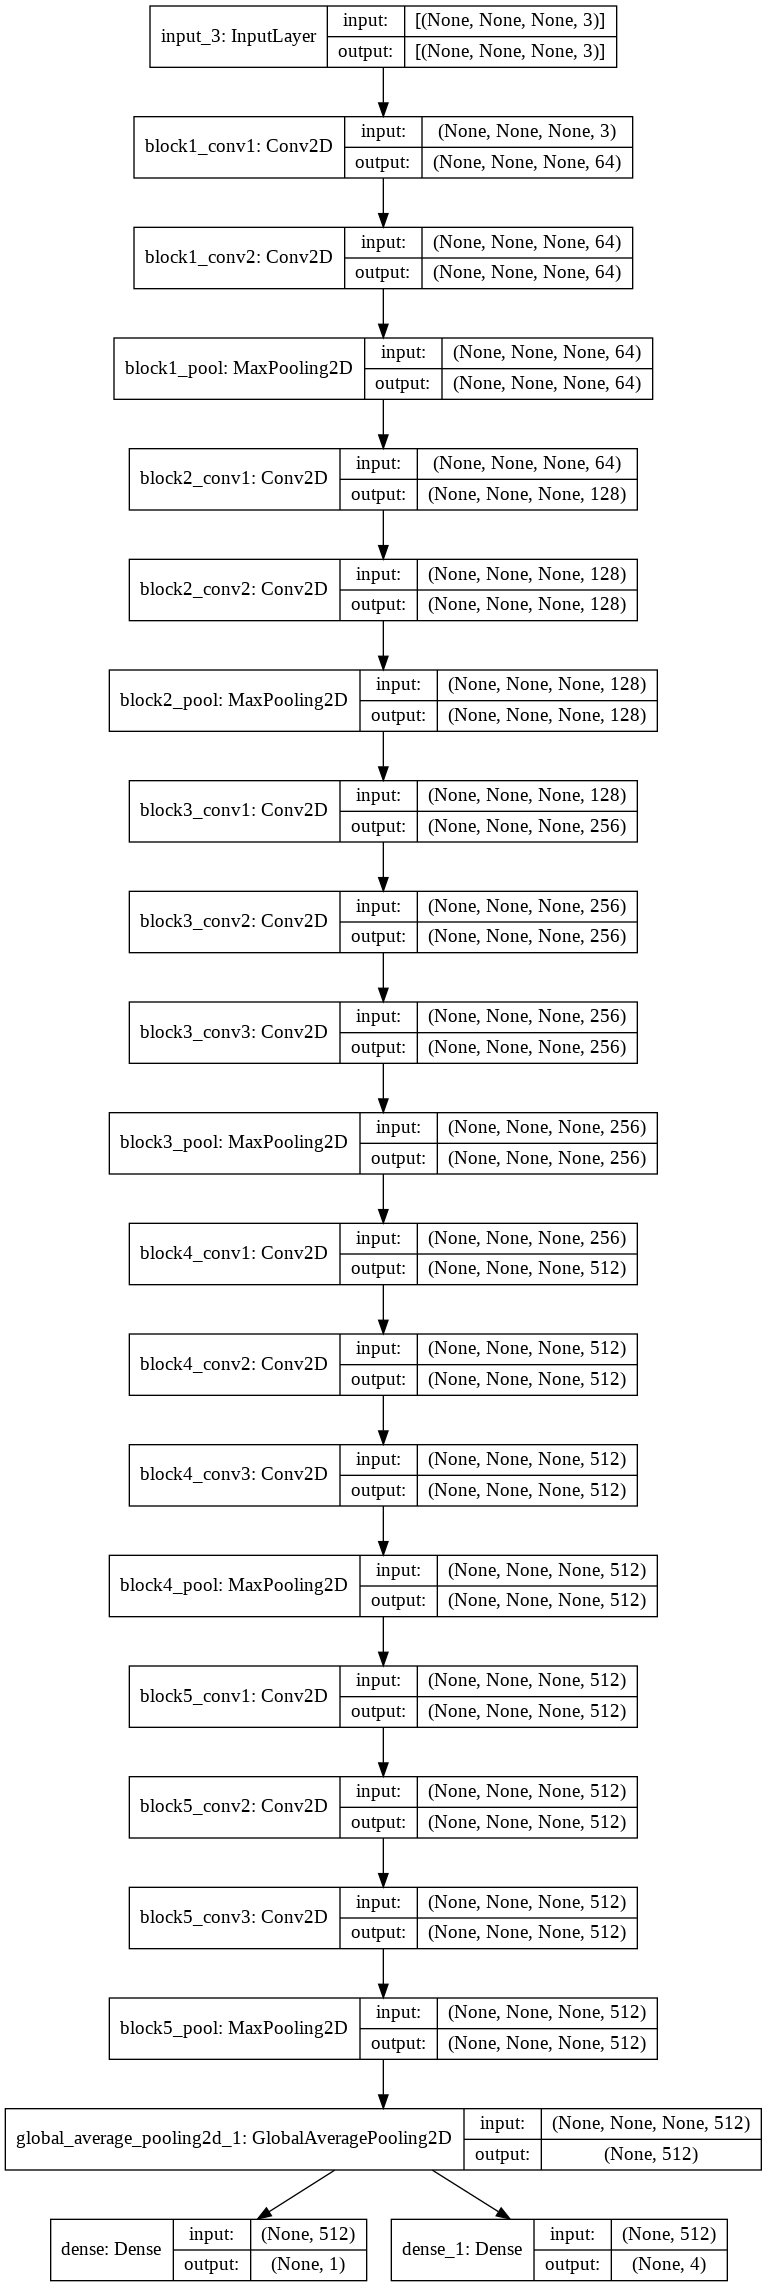

In [86]:
tf.keras.utils.plot_model(model=model_, show_shapes=True)

In [78]:
np.array(im)  #이미지를 numpy 형태

array([[[ 30,  29,  27],
        [ 35,  34,  32],
        [ 41,  40,  38],
        ...,
        [ 56,  59,  52],
        [ 56,  59,  52],
        [ 56,  59,  52]],

       [[ 31,  30,  28],
        [ 34,  33,  31],
        [ 39,  38,  36],
        ...,
        [ 57,  60,  53],
        [ 57,  60,  53],
        [ 57,  60,  53]],

       [[ 31,  30,  28],
        [ 33,  32,  30],
        [ 36,  35,  33],
        ...,
        [ 59,  62,  55],
        [ 59,  62,  55],
        [ 59,  62,  55]],

       ...,

       [[ 87,  68,  61],
        [ 94,  75,  68],
        [ 96,  77,  70],
        ...,
        [ 30,  31,  33],
        [ 30,  31,  33],
        [ 30,  31,  33]],

       [[ 99,  80,  73],
        [103,  84,  77],
        [110,  91,  84],
        ...,
        [ 32,  33,  35],
        [ 32,  33,  35],
        [ 32,  33,  35]],

       [[113,  94,  88],
        [111,  92,  86],
        [118,  99,  93],
        ...,
        [ 33,  34,  36],
        [ 33,  34,  36],
        [ 33,  34,  36]]

In [79]:
np.array(im).shape  #이미지 하나

(222, 300, 3)

In [84]:
model_(np.array(im)[np.newaxis])  # 이상무

[<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[-1.5340592]], dtype=float32)>,
 <tf.Tensor: shape=(1, 4), dtype=float32, numpy=array([[2.8846738, 2.8946097, 1.0113556, 5.916041 ]], dtype=float32)>]

문제점
1. 이미지 받을때 학습 시 좌표와 class 와 함께 학습시키기

#### 지도학습
- classificatoin
- regression
 > 신경망 모델 기반은 기본적 regression(회귀)
  - classification은 클래스 개수 만큼의 실수값 나오며 가장 큰 값 선택


loss function
- 하나로 만들어도 

> Convolution 특징
  - 특징과 위치를 동시에 알 수 있어 multi-task 문제가 잘 되는 편loss function
  - 하나로 만들어도 

  > Convolution 특징
    - 특징과 위치를 동시에 알 수 있어 multi-task 문제가 잘 되는 편

없는 경우 상속을 통해서 만들어야함없는 경우 상속을 통해서 만들어야함

In [ ]:
model.compile(loss=['sparse_categorical_crossentropy','mean_squared_error']) #동시에 두개의 loss

In [88]:
#딕셔너리 형태로 사용
losss={
    'a':'sparse_categorical_crossentropy',
    'b':'mean_squared_error'
}
lw= {
    'a':1.0,
    'b':2.0
}

In [95]:
model.compile(  loss=losss , loss_weights=lw , optimizer='adam', metrics=['acc','ms'])

### 학습
- fit
- fit_generator
> generator 의 Lazy 기법
  - augmentation 동시에 하면 학습 속도가 느리지만 하드웨어 성능을 효율적으로 사용
    - Augmentor로 generator
- train_on_batch   : batch사이즈 만큼 학습

- 간단하기 때문에 callback 상속해서 사용해서 확장
    - tf.keras.callbacks.ReduceLROnPlateau  
    - tf.keras.callbacks.ModelCheckpoint
      - 기본적으로 refit 가능(기존 weight에서 계속 진행)
      - batch 불가     - 기본적으로 refit 가능(기존 weight에서 계속 진행)
            - batch 불가

> 함수 커스터마이징
  - 함수형 패러다임 decorator

- Custom training 
  - Autograd : 자동 미분 
    - TF : GradientTape 방식
      - gradient 값 저장flow.org/tutorials/customization/custom_training_walkthrough?hl=ko 

- 참고: https://www.tensorflow.org/tutorials/customization/custom_training_walkthrough?hl=ko 







In [ ]:
import Augmentor
pipeline = Augmentor.Pipeline('./101_ObjectCategories/')
pipeline.rotate(0.1,20,10)
pipeline.keras_generator(32,scaled=False)  #generator

In [ ]:
tf.keras.callbacks.ReduceLROnPlateau  #고원현상 체크해서 learning rate 조정
tf.keras.callbacks.ModelCheckpoint    #모델 학습 시점 저장 -> 학습을 refit
tf.keras.callbacks.LearningRateScheduler # learning rate 스케줄링
tf.keras.callbacks.EarlyStopping       #metrics 가 어느정도 변하지 않으면 epoch을 중간에 멈춤춤